In [1]:
from keras.datasets import mnist

In [6]:
import matplotlib.pyplot as plt
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11419648/11490434 [============================>.] - ETA: 0s

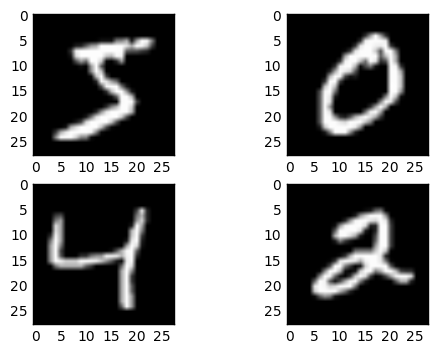

In [11]:
plt.subplot(221)
plt.imshow(X_train[0] , cmap='gray')
plt.subplot(222)
plt.imshow(X_train[1],cmap='gray')
plt.subplot(223)
plt.imshow(X_train[2],cmap='gray')
plt.subplot(224)
plt.imshow(X_train[5],cmap='gray')
plt.show()

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils 

In [16]:
# seed with a prime number for reproducibility
seed = 7
np.random.seed(seed)

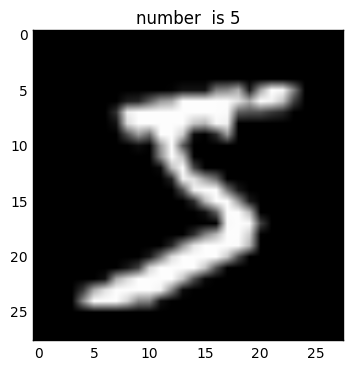

In [27]:
plt.imshow(X_train[0],cmap = 'gray')
plt.title('number  is '+ str(y_train[0]))
plt.show()

In [31]:
#reshape it into a vector to obtain input for perceptron
no_pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],no_pixels).astype('float32')

In [33]:
#same for the training set
X_test = X_test.reshape(X_test.shape[0],no_pixels).astype('float32')

In [35]:
# dividing the gray scale values to normalise then. Since the values are known to varry between 0 and 255. Its resonable
#to divide them by 255
X_train = X_train/255
X_test = X_test/255

In [41]:
# Its harder to train the model for the output values in decimal. So we use one hot encoding to convert them into 
# binary values (array representation with 1 at the place of that decimal and rest entries as zero)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [48]:
# define a model 
def base_model():
    model = Sequential()
    model.add(Dense(no_pixels,input_dim = no_pixels,kernel_initializer='normal',activation='relu'))
    model.add(Dense(10,kernel_initializer='normal',activation='softmax'))
    # now we configure the learning process which is done by compile
    model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
    return model

In [49]:
# we will print the model performance at each epoch for which we keep the verbose  = 2 
model =  base_model()
model.fit(X_train,y_train,batch_size = 200 ,epochs = 10,validation_data = (X_test,y_test),verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
11s - loss: 0.2781 - acc: 0.9212 - val_loss: 0.1412 - val_acc: 0.9571
Epoch 2/10
10s - loss: 0.1114 - acc: 0.9678 - val_loss: 0.0919 - val_acc: 0.9708
Epoch 3/10
10s - loss: 0.0719 - acc: 0.9796 - val_loss: 0.0786 - val_acc: 0.9774
Epoch 4/10
10s - loss: 0.0505 - acc: 0.9856 - val_loss: 0.0753 - val_acc: 0.9771
Epoch 5/10
10s - loss: 0.0375 - acc: 0.9892 - val_loss: 0.0692 - val_acc: 0.9785
Epoch 6/10
10s - loss: 0.0271 - acc: 0.9928 - val_loss: 0.0632 - val_acc: 0.9805
Epoch 7/10
10s - loss: 0.0213 - acc: 0.9946 - val_loss: 0.0618 - val_acc: 0.9809
Epoch 8/10
10s - loss: 0.0143 - acc: 0.9968 - val_loss: 0.0628 - val_acc: 0.9798
Epoch 9/10
10s - loss: 0.0111 - acc: 0.9978 - val_loss: 0.0598 - val_acc: 0.9811
Epoch 10/10
13s - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0588 - val_acc: 0.9813


In [53]:
# now use the model to predict the output
base_model_score = model.evaluate(X_test,y_test,verbose=0)
print('The loss and accuracy of the model on test data is '+str(base_model_score))

The loss and accuracy of the model on test data is [0.058769729931678741, 0.98129999999999995]
